In [1]:
import matplotlib
import matplotlib.pyplot as plt
#from labellines import labelLine, labelLines
import seaborn as sns
import os
import pandas as pd
import glob
import numpy as np

In [2]:
path = '/uscms/home/jieun201/nobackup/YOURWORKINGAREA/june23_ds8_labelsOnly'
csv_files = glob.glob(path + "/*.csv")
df_labels = (pd.read_csv(file) for file in csv_files)
big_df_labels   = pd.concat(df_labels, ignore_index=True)

In [3]:
#big_df_labels

In [4]:
path = '/uscms/home/jieun201/nobackup/YOURWORKINGAREA/june23_ds8_negativeLabelsOnly'
csv_files2 = glob.glob(path + "/*.csv")
df_labels2 = (pd.read_csv(file) for file in csv_files2)
big_df_labels2   = pd.concat(df_labels2, ignore_index=True)
#big_df_labels2

In [5]:
mergePosNeg = pd.concat([big_df_labels, big_df_labels2])
#mergePosNeg

Text(0, 0.5, 'Tracks')

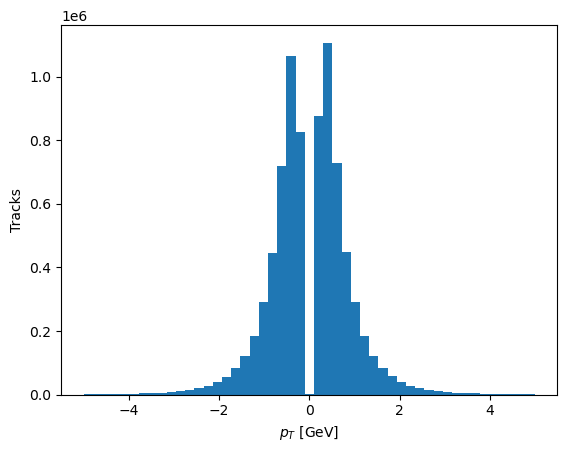

In [6]:
plt.hist(mergePosNeg['pt'],bins=np.linspace(-5,5,50),histtype='stepfilled');
plt.xlabel(r'$p_T$ [GeV]')
plt.ylabel('Tracks')

In [7]:
#nearZeroPT = mergePosNeg[   (mergePosNeg['pt'] > 0) & (mergePosNeg['pt'] < 0.1)]
#nearZeroPT2 = mergePosNeg[   (mergePosNeg['pt'] > -0.1) & (mergePosNeg['pt'] < 0)]

s = pd.Series(mergePosNeg['pt'])
BigSampleValueCounts = s.value_counts(bins=[-10,-2,-1.9,-1.8,-1.7,-1.6,-1.5,-1.4,-1.3,-1.2,-1.1,-1.0,-0.9,-0.8,-0.7,-0.6,-0.5,
                                              -0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,
                                              1.5,1.6,1.7,1.8,1.9,2.0,10]).sort_index()


In [8]:
TruthTotalCounts = np.array(BigSampleValueCounts)
#np.sum(TruthTotalCounts)

#printed out below and saved so the early cells don't need to be run
TruthTotalCounts = np.array([136244,  22896,  27127,  32528,  39104,  47190,  56900,  69910,
        85706, 105326, 130359, 165607, 198763, 256822, 323231, 399458,
       490657, 565226, 587652, 203420,    380,    380, 216509, 623085,
       592413, 505111, 408333, 326467, 259269, 200540, 166169, 131131,
       105435,  85022,  69922,  57426,  47443,  39366,  32326,  27757,
        22776, 137964])
TruthTotalCounts

array([136244,  22896,  27127,  32528,  39104,  47190,  56900,  69910,
        85706, 105326, 130359, 165607, 198763, 256822, 323231, 399458,
       490657, 565226, 587652, 203420,    380,    380, 216509, 623085,
       592413, 505111, 408333, 326467, 259269, 200540, 166169, 131131,
       105435,  85022,  69922,  57426,  47443,  39366,  32326,  27757,
        22776, 137964])

In [9]:
df1 = pd.read_csv('/uscms/home/jieun201/nobackup/YOURWORKINGAREA/dec6_ds8/TestSetTruePT.csv')
df2 = pd.read_csv('/home/jieun201/redo_dec6_dec8_FP/predictionsFiles.csv')
df3 = pd.read_csv('/home/jieun201/redo_dec6_dec8_FP/true.csv')
df2.columns.values[0] = "predict"
df3.columns.values[0] = "true"
df2['predict'] = df2['predict'].astype(int)
concatenate = pd.concat([df1,df2, df3], axis=1)
#concatenate

In [10]:
s2 = pd.Series(concatenate['pt'])
BigSampleValueCounts2 = s2.value_counts(bins=[-10,-2,-1.9,-1.8,-1.7,-1.6,-1.5,-1.4,-1.3,-1.2,-1.1,-1.0,-0.9,-0.8,-0.7,-0.6,-0.5,
                                              -0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,
                                              1.5,1.6,1.7,1.8,1.9,2.0,10]).sort_index()
testSetTotalCounts = np.array(BigSampleValueCounts2)
testSetTotalCounts

array([ 1445,   235,   279,   353,   452,   566,   606,   808,   908,
        1157,  1447,  1779,  2100,  2797,  3306,  4435,  5401,  6170,
        6516, 40674,    86,    82, 40678,  6706,  6404,  5383,  4182,
        3395,  2762,  2133,  1759,  1396,  1123,   906,   781,   610,
         495,   442,   349,   303,   254,  1377])

In [11]:
concatPosPredictRight1 = concatenate[(concatenate['predict'] ==1) | (concatenate['predict'] ==2)]
concatPosPredictRight1

,pt,predict,true
1,0.195180,2,2
2,1.338710,2,0
3,0.180981,2,2
5,0.283597,2,0
6,-0.314178,1,0
...,...,...,...
163034,-0.199993,1,1
163035,0.395177,2,0
163036,-0.164451,1,1
163037,-0.456705,1,0


In [12]:
s3 = pd.Series(concatPosPredictRight1['pt'])
BigSampleValueCounts3 = s3.value_counts(bins=[-10,-2,-1.9,-1.8,-1.7,-1.6,-1.5,-1.4,-1.3,-1.2,-1.1,-1.0,-0.9,-0.8,-0.7,-0.6,-0.5,
                                              -0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,
                                              1.5,1.6,1.7,1.8,1.9,2.0,10]).sort_index()
testSetAs12 = np.array(BigSampleValueCounts3)
testSetAs12

array([   96,    23,    28,    27,    32,    38,    61,    57,    68,
         127,   123,   153,   221,   311,   446,   665,  1066,  1706,
        2864, 27710,    78,    80, 32074,  3637,  2165,  1245,   731,
         472,   314,   243,   195,   146,   108,    78,    71,    54,
          35,    39,    24,    29,    27,    96])

In [13]:
makeRatio = TruthTotalCounts/testSetTotalCounts
makeRatio

array([ 94.28650519,  97.42978723,  97.22939068,  92.14730878,
        86.51327434,  83.3745583 ,  93.89438944,  86.52227723,
        94.38986784,  91.03370787,  90.08914997,  93.08993817,
        94.64904762,  91.82052199,  97.77102238,  90.06944758,
        90.84558415,  91.60875203,  90.18600368,   5.00122929,
         4.41860465,   4.63414634,   5.32250848,  92.91455413,
        92.50671455,  93.83447892,  97.64060258,  96.16111929,
        93.87002172,  94.01781528,  94.46787948,  93.93338109,
        93.88691006,  93.84326711,  89.52880922,  94.14098361,
        95.84444444,  89.06334842,  92.62464183,  91.60726073,
        89.66929134, 100.19172113])

In [14]:
Sum = np.dot(testSetAs12,makeRatio)
Sum

1959708.570841615

In [15]:
totalTracksTruthSet = 7999350 
Sum/totalTracksTruthSet

0.24498347626264821